# Examples of MDPs

### Structure

$\texttt{structure[i,j]}$ stores the type of the cell $\texttt{(i,j)}$. 
If $\texttt{structure[i,j]}$ is $\texttt{'E'}$. it means the cell is empty and the agent is free to move in any direction. If it is $\texttt{'B'}$. then the cell is blocked, the agent cannot go there.
If it is one of $\texttt{'D'}$.,$\texttt{'U'}$.,$\texttt{'R'}$. and $\texttt{'L'}$., the agent is free to enter the cell in any direction, but it cannot leave the cell in the opposite direction of the label.
    For example, if the label is $\texttt{'D'}$., then the agent cannot go up as if there is an obstacle there.
If it is $\texttt{'T'}$., then the cell is a trap cell, which means if the agent cannot leave the cell once it reaches it.

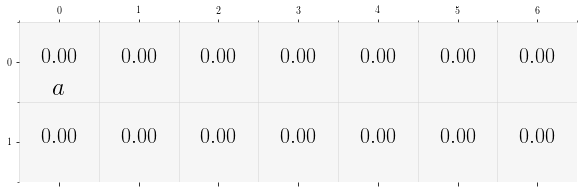

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 

shape = n_cols, n_rows = (2,7)

structure = np.array([
['E','E','E','E','E','E','E'],
['E','E','E','E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label2 = np.empty(shape,dtype=object)
label2.fill(())
label[0,0] = ('a',)
label2[1,6] = ('b',)
comb_labels = np.empty(shape, dtype=object)
comb_labels.fill(())
comb_labels[0,0] = ('a',)
comb_labels[1,6] = ('b',)

    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=10, p=1.0)
grid_mdp.plot()

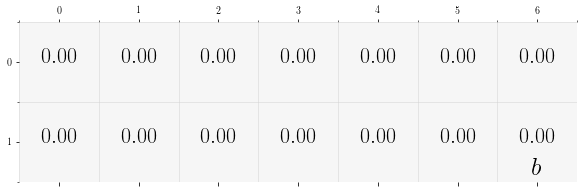

In [2]:
grid_mdp2 = GridMDP(shape=shape,structure=structure,label=label2,figsize=10,p=1.0)
grid_mdp2.plot()

In [4]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl1 = 'FG a'
ltl2 = 'FG b' # LTL seems to have to contain all labels for MDP

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl1)
oa2 = OmegaAutomaton(ltl2)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
print('Number of Omega-automaton states (including the trap state):',oa2.shape[1])


Number of Omega-automaton states (including the trap state): 3
Number of Omega-automaton states (including the trap state): 3


In [6]:
display(oa1)

In [5]:
display(oa2)

In [7]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp2,oa2) 

In [8]:
starts=[(0, 6), (1, 0)]

In [9]:
from multi import MultiControlSynthesis

# 
mcsrl = MultiControlSynthesis(np.array([csrl1,csrl2], dtype=object), mdp=comb_mdp, starts=starts)

In [116]:
mcsrl.ind_qlearning(T = 100, K=1000)

In [25]:
Q1=csrl1.q_learning(start=(0,6), T=100, K=3000)

In [22]:
Q2=csrl2.q_learning(start=(1,0), T=100, K=3000)

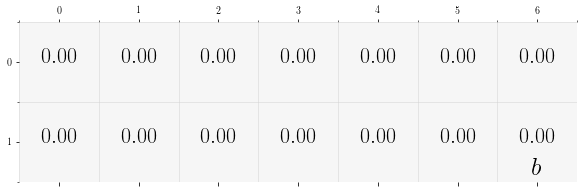

In [23]:
value2=np.max(Q2,axis=4)
# csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.pdf')
csrl2.plot(value2,iq=(0,0))

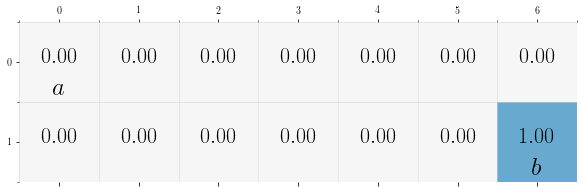

In [15]:
rew_structure = value2[0][1]
comb_mdp = GridMDP(shape=shape,structure=structure,reward=rew_structure,label=comb_labels,figsize=10, p=1)
comb_mdp.plot()

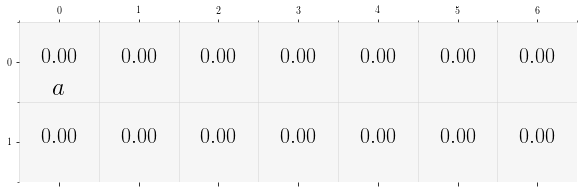

In [26]:
value=np.max(Q1,axis=4)
# csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.pdf')
csrl1.plot(value,iq=(0,0))

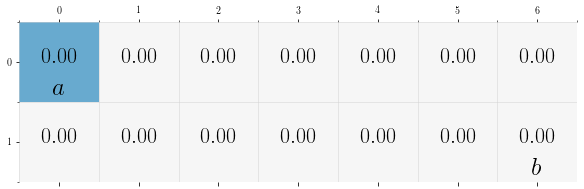

In [19]:
rew_structure = value[0][1]
comb_mdp = GridMDP(shape=shape,structure=structure,reward=rew_structure,label=comb_labels,figsize=10, p=1)
comb_mdp.plot()

In [24]:
policy2=np.argmax(Q2,axis=4)
print(policy2)
# csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.pdf')
csrl2.plot(value2,policy2)

[[[[1 1 3 1 1 1 1]
   [2 2 2 2 2 2 5]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 2]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]]


interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [27]:
policy=np.argmax(Q1,axis=4)
print(policy)
# csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.pdf')
csrl1.plot(value,policy)

[[[[5 3 3 3 3 3 3]
   [0 2 0 0 3 0 0]]

  [[3 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]]


interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [14]:
policies = [policy, policy2]
agents = [csrl1, csrl2]
mcsrl.simulate( policies, agents, T= 20, mdp2 =comb_mdp, animation="comb_test")

20
e [[(0, 0, 0, 6), (0, 0, 1, 0)]]


KeyError: ('a', 'b')

In [30]:
controls = np.array([csrl1,csrl2], dtype=object)
controls.shape 

(2,)

In [28]:
c = np.zeros(2, dtype = object)
c[0] = csrl1
c

array([<csrl.ControlSynthesis object at 0x0000020D68D536A0>, 0],
      dtype=object)

In [ ]:
state = [[0, 0, 0, 0], [0, 0, 0, 2]]
mcsrl.Q[0][state[0]].shape

In [24]:
mcsrl.starts

[(0, 6), (1, 0)]